# Task 1: Impact of interventions on curbing the impact of Covid-19
Meghan O'Connell · 4 Submissions · 4 months ago

### Task Details
Can we predict the impact of various social interventions (including social distancing requirements, masks, school and business closures, opening of testing clinics, contact tracing, availability of serological testing, etc.) and public attitudes/sentiment on the spread of COVID-19 through populations?

As an extension, can we estimate the impact if various measures were lifted at different time intervals? What is the expected impact on effective social distance? What is the impact on disease spread (Ro) and illness?

We are looking for insights into reliable predictors of the rate of spread of disease through a population, which do not need to be constrained to the specific factors outlined above.

### Evaluation
1. Scientific rigor
    - Is the solution evidence based? I.e. does it leverage robust data?
2. Scientific model/strategy
    - Did the solution employ a robust scientific method?
3. Unique and novel insight
    - Does the solution identify information (new data, features, insights etc) that is yet to be “uncovered?”
4. Market Translation and Applicability
    - Does the solution resolve an existing market need for either an individual, health institution or policy maker?
5. Speed to market
    - Does it apply to an existing product vision such as a self assessment tool or policy decision-making tool?
6. Longevity of solution in market
    - Is the solution one that could be used in various markets through time?
7. Ability of user to collaborate and contribute to other solutions within the Kaggle community
    - Did the user provide expertise and or resources in the form of datasets or models to their fellow Kaggle members?
8. We also ask that every notebook submission start with a short abstract outlining how you have addressed each of the above criteria in a clear and concise manner. This is to ensure our multi-stakeholder (patients, healthcare practitioners, industry, academics) coalition leaders are able to quickly advance and provide their expertise to further refine your solutions and build with you.

In [290]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

### firstly, let´s check the dataframe structure

In [160]:
df= pd.read_csv("covid-19-uk-historical-data.csv")
df

,Unnamed: 0,date,country,areacode,area,totalcases
0,0,2020-01-30,England,E06000014,York,1.0
1,1,2020-02-03,England,E10000002,Buckinghamshire,1.0
2,2,2020-02-03,Wales,W11000028,Aneurin Bevan,0.0
3,3,2020-02-03,Wales,W11000023,Betsi Cadwaladr,0.0
4,4,2020-02-03,Wales,W11000029,Cardiff and Vale,0.0
...,...,...,...,...,...,...
23293,23293,2020-07-29,Scotland,S08000024,Lothian,3192.0
23294,23294,2020-07-29,Scotland,S08000025,Orkney,9.0
23295,23295,2020-07-29,Scotland,S08000026,Shetland,54.0
23296,23296,2020-07-29,Scotland,S08000030,Tayside,1785.0


In [161]:
date_lst=[]

for date in df.date:

    date=datetime.strptime(date, "%Y-%m-%d")
    date_lst.append(date)
df["datetime"]=date_lst



def find_days(df):
    days_lst=[0]
    m=0
    n=0
    for days in df["datetime"]:

            m+=1

            if m<df.shape[0]:

                delta=df["datetime"][m]-df["datetime"][n]
                n+=1

                #print(delta)
                #print(delta.days)
                days_lst.append(delta.days)
            else:
                break
    df["days"] = days_lst


find_days(df)
    
    

In [162]:
df.days= df.datetime - df.datetime[0]   # simplest way to find intervals! No function required, no for cycles no df.apply() etc




In [163]:
time_range= df.datetime[df.shape[0]-1]-df.datetime[0]   #This trick is amazing to avoid having a Series as a result. Not sure why it works

"this will be used for plotting later: "

tot_days= time_range.days

lockdown was imposed on the 23rd of March 2020, 23-03-2020

In [230]:
df[df["date"]=="2020-03-23"].head(1)

,Unnamed: 0,date,country,areacode,area,totalcases,datetime,days
2503,2503,2020-03-23,England,E09000002,Barking and Dagenham,70.0,2020-03-23,53 days


Lockdown began on day 52!

<ipython-input-338-445e17944fa8>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


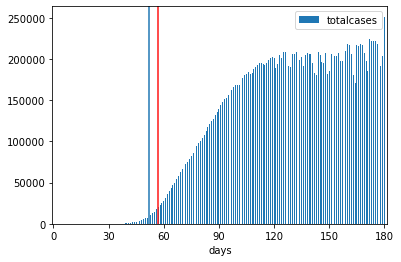

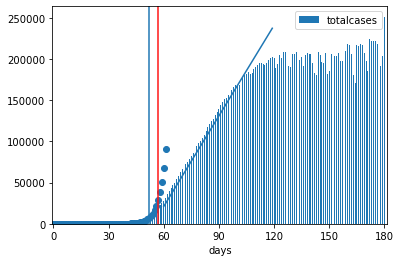

In [338]:
England_df= df[df["country"]== "England"]

Scotland_df= df[df["country"]== "Scotland"]

Wales_df= df[df["country"]== "Wales"]

NI_df= df[df["country"]== "Northern Ireland"]



def get_total(df):
    
    
    days=[]
    total_cases=[]
    for n in range(182):
        tot= df[df["days"] ==pd.Timedelta(n, unit='d') ].totalcases.sum()
        days.append(n)
        total_cases.append(tot)
    
    new_df= pd.DataFrame({"days": days,"totalcases": total_cases})
    new_df.plot(kind='bar',x='days',y='totalcases', xticks=range(0,182,30), rot=0)
    
    plt.axvline(x=52)
    
    
    """the buffer period has been included to show possible delay in how the measures affected transmission, 
    namely up to 5 days after the lockdown started, 
    the registered cases were still of infections occurred before the lockdown itself"""
    
    plt.axvline(x=57, color='#ff1414') # a buffer period of 10 days has been considered
    
    
    
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    
    
    Y_1= new_df[new_df["days"] < 57 ]
    Y_1= Y_1.totalcases
    Y_1= Y_1 + 0.01 # get rid of zeroes
    Y_1= np.log(Y_1)# to make it "fittable" with linear regression 
    
    Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]
    Y_2= Y_2.totalcases
    
    
    'X used to train:'
    
    X_1=np.array(range(57))
    X_2=np.array(range(32))
    
    X_1=X_1.reshape(-1, 1)
    X_2=X_2.reshape(-1, 1)
    
    
    linear_1=LinearRegression()
    linear_2=LinearRegression()
    model_1=linear_1.fit(X_1,Y_1) 
    model_2=linear_2.fit(X_2,Y_2) 
    
    
    'X used to predict:'
    
    X_pred_2= np.array(range(60))
    X_pred_2= X_pred_2.reshape(-1, 1)
    
    X_pred_1= np.array(range(62))
    X_pred_1= X_pred_1.reshape(-1, 1)
    
    
    pred_1=model_1.predict(X_pred_1) #I expect this to be exponential 
    pred_2=model_2.predict(X_pred_2) #I expect this to be linear
    
    ''' END OF THE MACHINE LEARNING PART '''
    ''' END OF THE MACHINE LEARNING PART '''
    
    pred_1= np.exp(pred_1)
    
    
    
    "Same code as before just to duplicate plot"
    new_df.plot(kind='bar',x='days',y='totalcases', xticks=range(0,182,30), rot=0)
    plt.axvline(x=52)
    plt.axvline(x=57, color='#ff1414')
    "END"
    
    plt.scatter(np.array(range(62)),pred_1)
    
    #print(model_2.get_params())
    plt.plot(np.array(range(60,120)),pred_2)
    
    return new_df
    
total_England_df= get_total(England_df)


<ipython-input-338-445e17944fa8>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


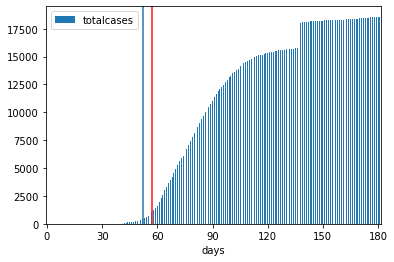

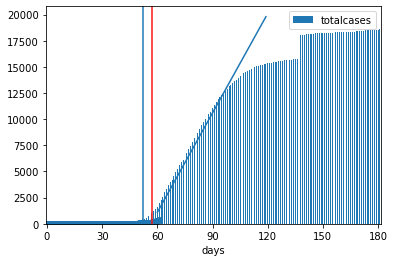

In [339]:
total_Scotland_df= get_total(Scotland_df)



<ipython-input-338-445e17944fa8>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


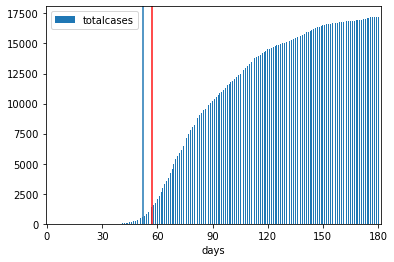

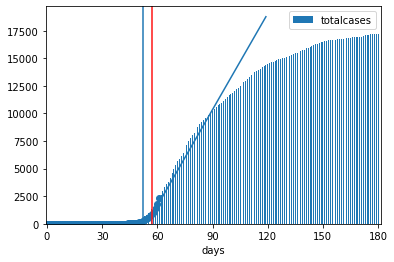

In [340]:
total_Wales_df= get_total(Wales_df)



<ipython-input-338-445e17944fa8>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


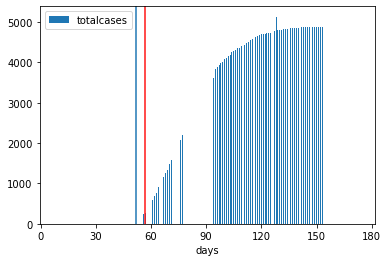

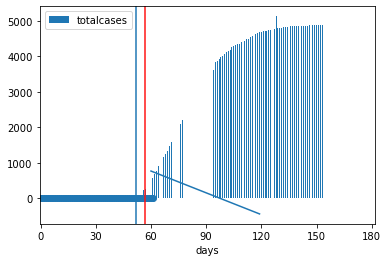

In [341]:
total_NI_df= get_total(NI_df)

